In [1]:
# Import all pacakges needed for notebook
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data to a dataframe using an API call
api = KaggleApi()
api.authenticate()
api.dataset_download_file('thedevastator/cancer-patients-and-air-pollution-a-new-link','cancer patient data sets.csv', path='./')
df = pd.read_csv('cancer%20patient%20data%20sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


C:\Users\Bryson\AppData\Local\Temp\ipykernel_23312\36727678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


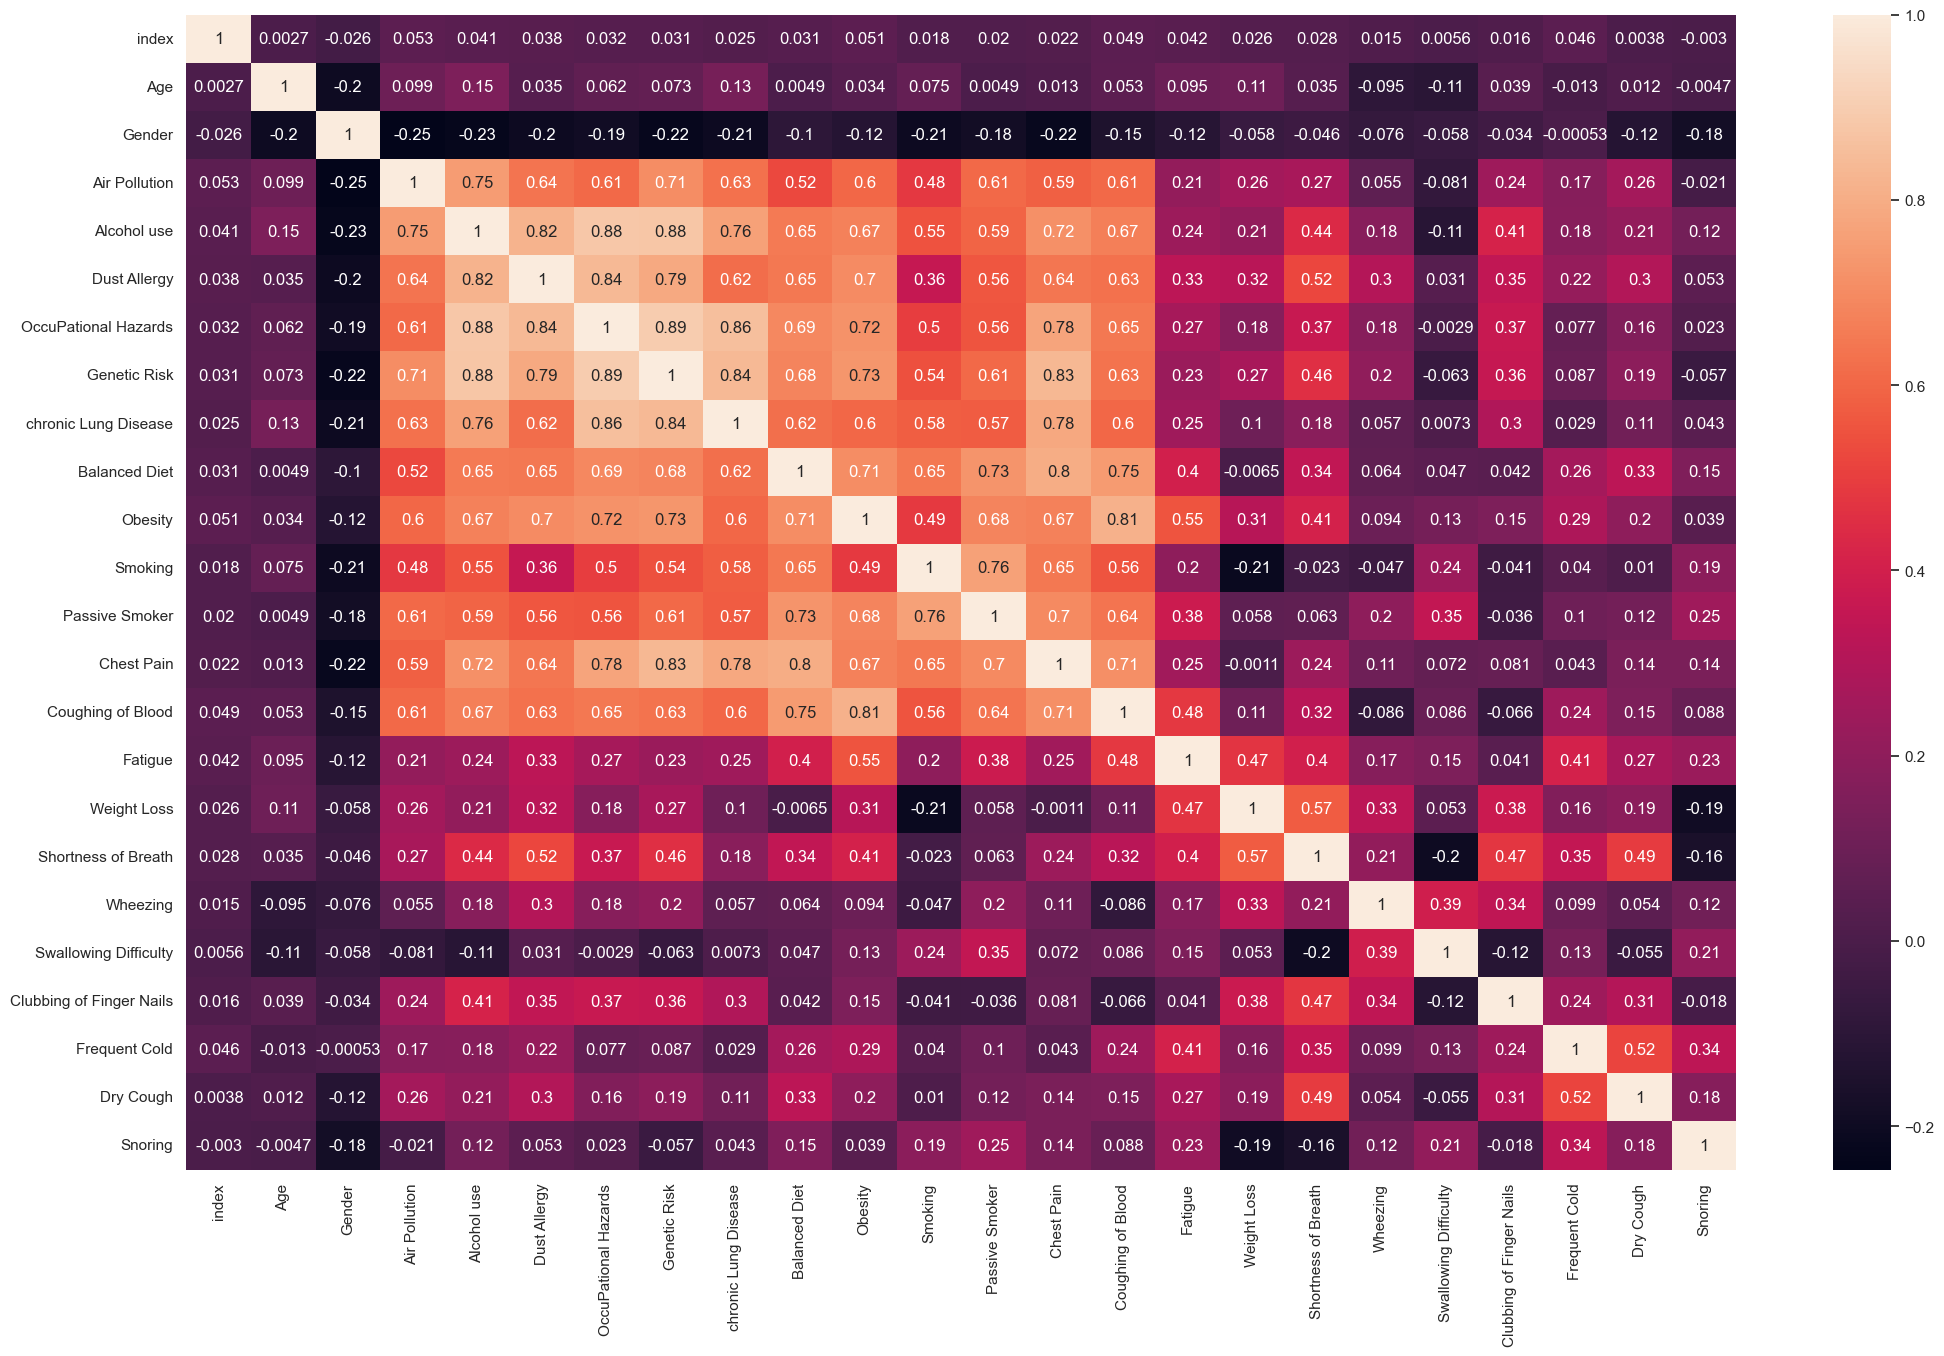

In [2]:
#Correlation Matrix, saved as PNG
corr = df.corr()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(corr, annot=True)
plt.savefig('Graphs\CorrPlot.png')
plt.show()

In [3]:
#Basic Statistics
pd.set_option('display.max_columns', None)
print('Top 5 Rows of Dataset:')
display(df.head())
print('Descriptive Statistics:')
display(df.describe())
print('Missing Values:')
display(df.isnull().sum())
pd.reset_option('max_columns')


Top 5 Rows of Dataset:


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


Descriptive Statistics:


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


Missing Values:


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

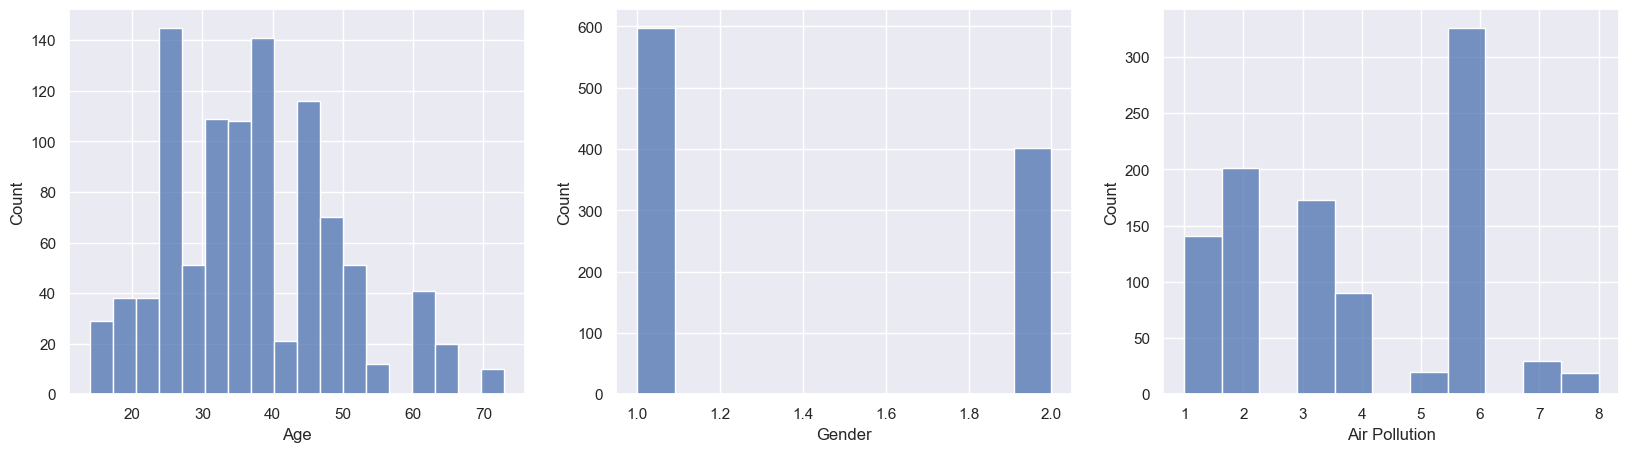

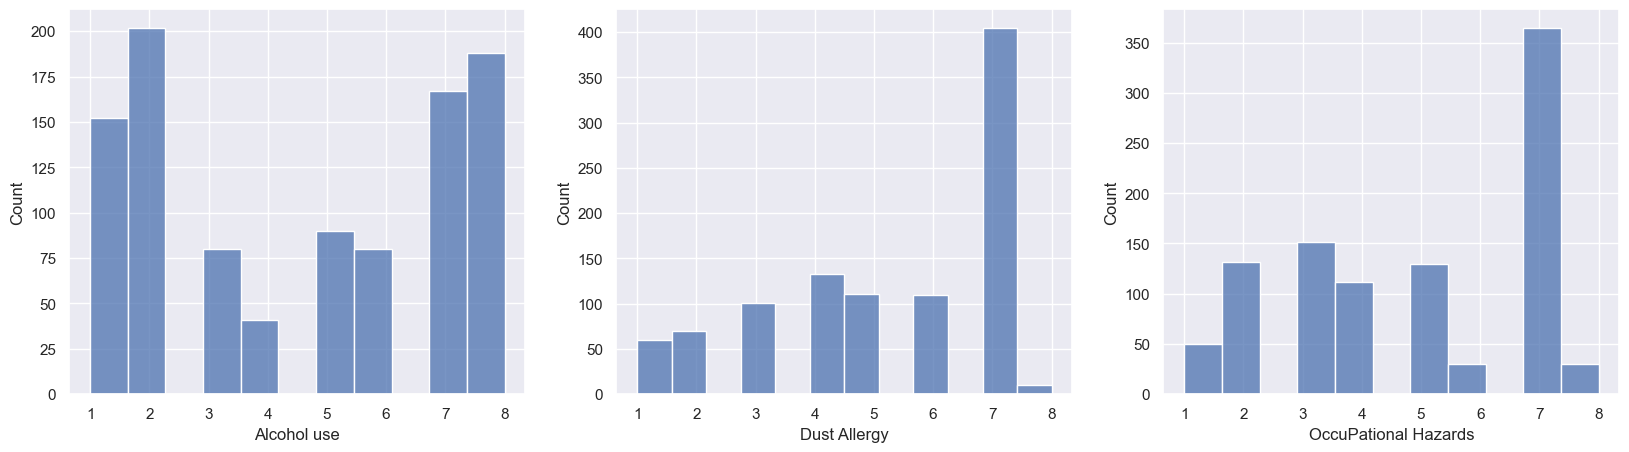

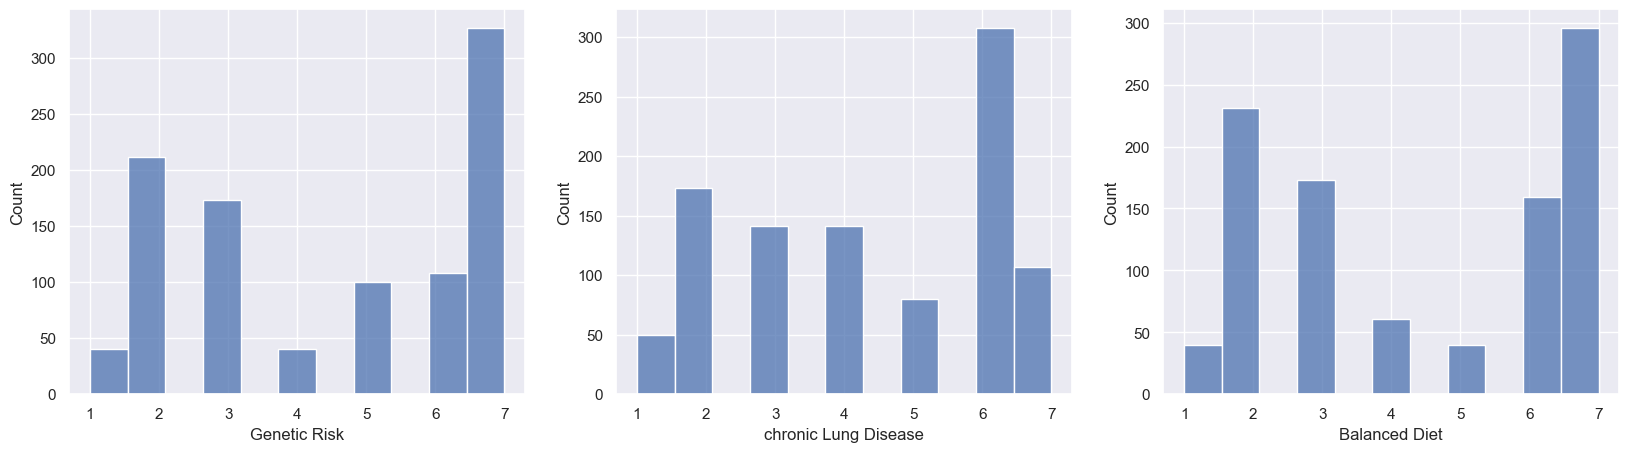

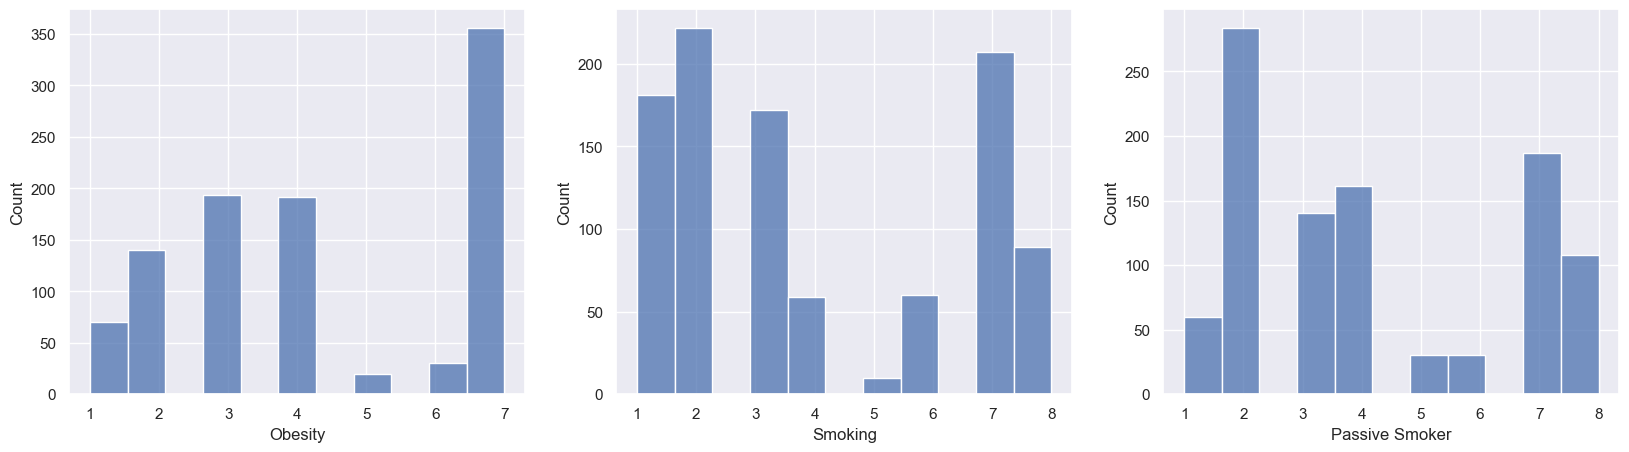

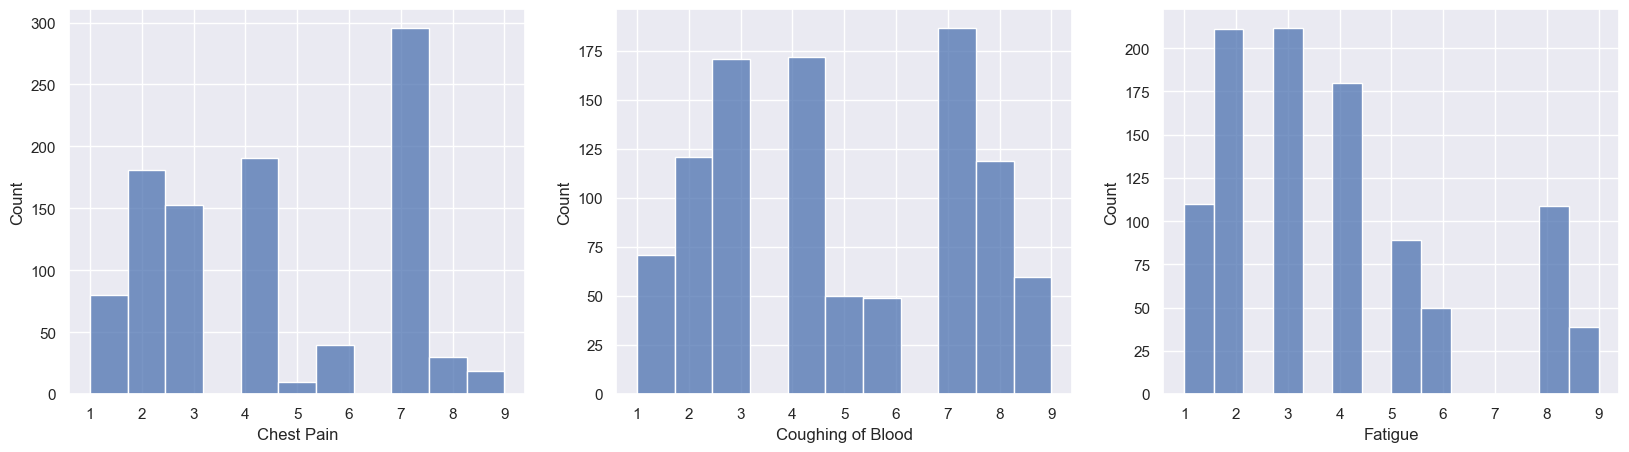

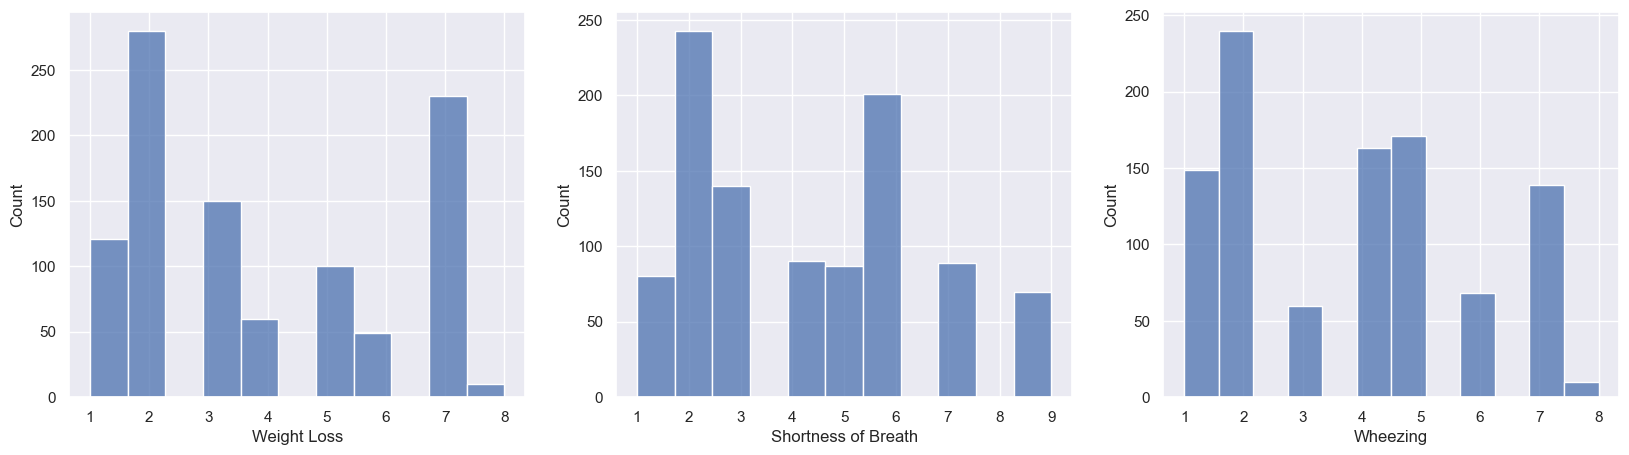

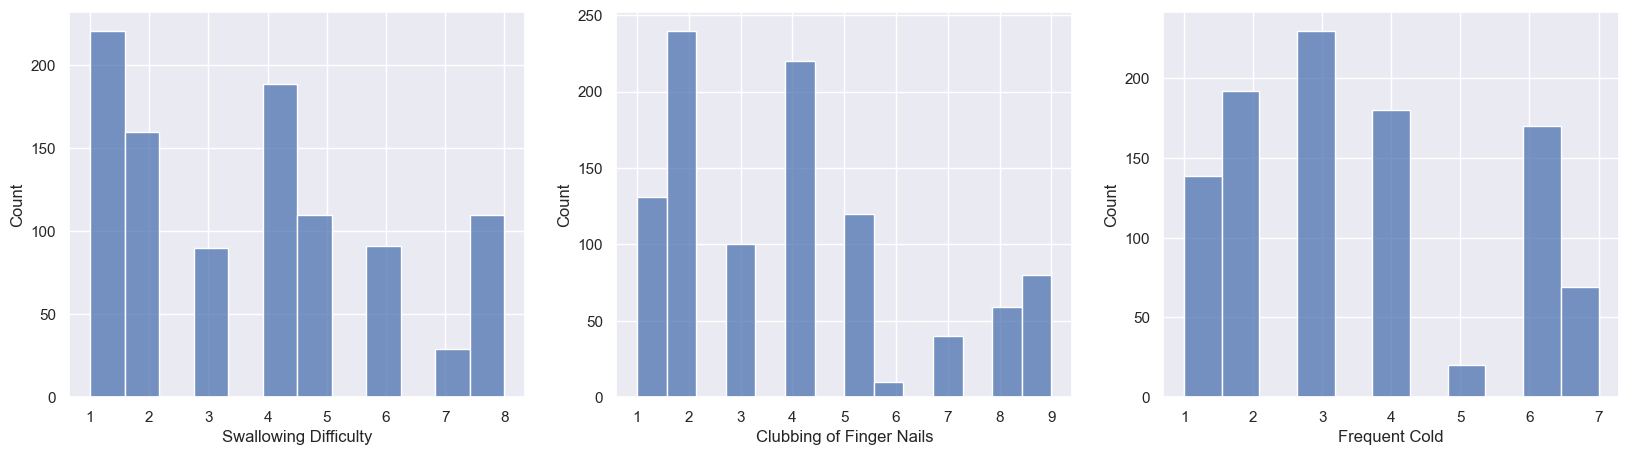

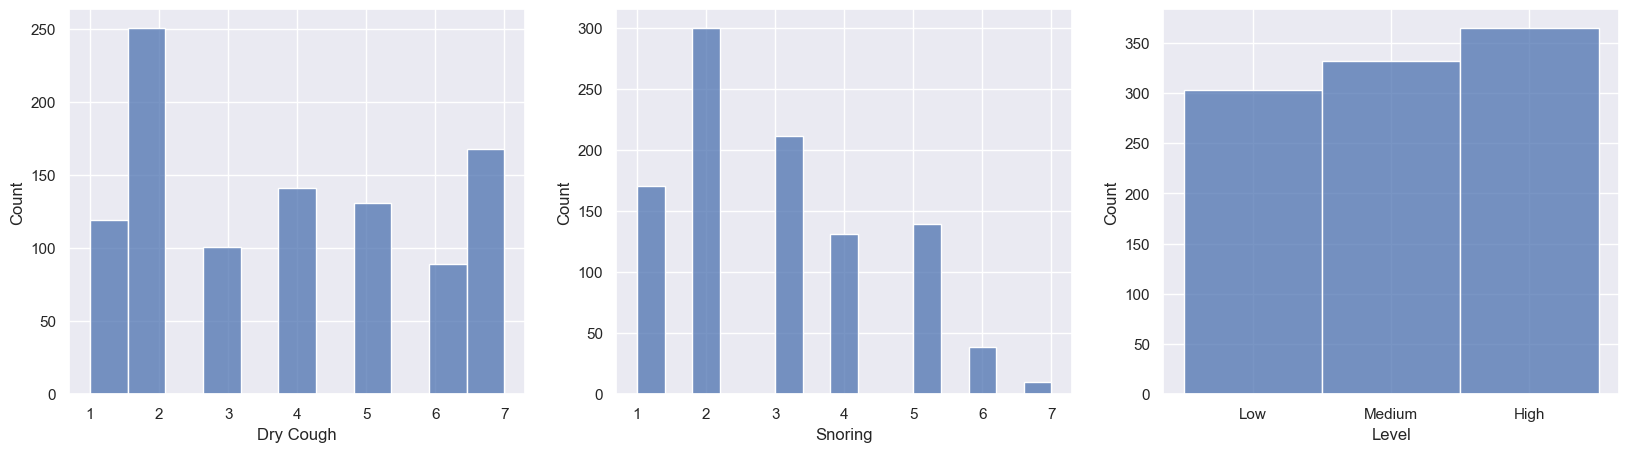

In [5]:
#Distribution of values by feature
sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Age'], kde=False, ax=ax[0])
sns.histplot(df['Gender'], kde=False, ax=ax[1])
sns.histplot(df['Air Pollution'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Age_Gender_Pollution.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Alcohol use'], kde=False, ax=ax[0])
sns.histplot(df['Dust Allergy'], kde=False, ax=ax[1])
sns.histplot(df['OccuPational Hazards'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Alc_Dust_Hazards.png')
plt.show()


sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Genetic Risk'], kde=False, ax=ax[0])
sns.histplot(df['chronic Lung Disease'], kde=False, ax=ax[1])
sns.histplot(df['Balanced Diet'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Genetic_Lung_Diet.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Obesity'], kde=False, ax=ax[0])
sns.histplot(df['Smoking'], kde=False, ax=ax[1])
sns.histplot(df['Passive Smoker'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Obesity_Smoking_Passive.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Chest Pain'], kde=False, ax=ax[0])
sns.histplot(df['Coughing of Blood'], kde=False, ax=ax[1])
sns.histplot(df['Fatigue'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Chest_Blood_Fatigue.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Weight Loss'], kde=False, ax=ax[0])
sns.histplot(df['Shortness of Breath'], kde=False, ax=ax[1])
sns.histplot(df['Wheezing'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Weight_Breath_Wheezing.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Swallowing Difficulty'], kde=False, ax=ax[0])
sns.histplot(df['Clubbing of Finger Nails'], kde=False, ax=ax[1])
sns.histplot(df['Frequent Cold'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Swallowing_Nails_Cold.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
sns.histplot(df['Dry Cough'], kde=False, ax=ax[0])
sns.histplot(df['Snoring'], kde=False, ax=ax[1])
sns.histplot(df['Level'], kde=False, ax=ax[2])
plt.savefig('Graphs\Hist_Cough_Snoring_Level.png')
plt.show()

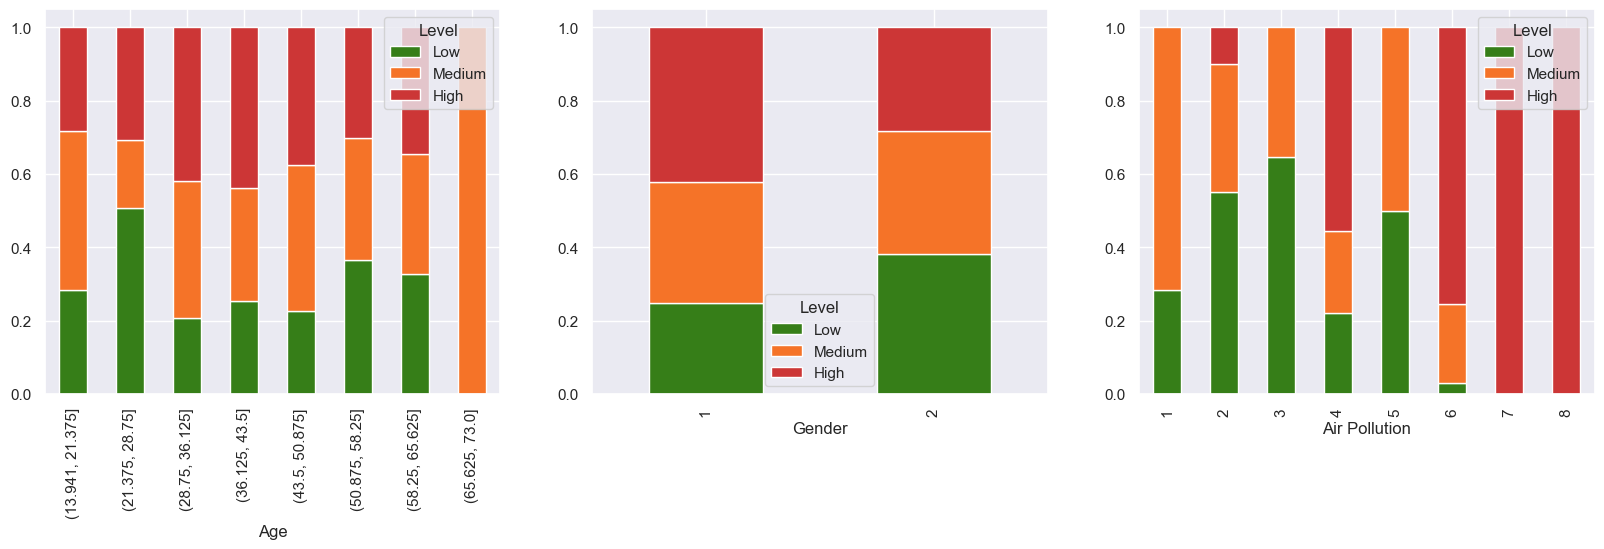

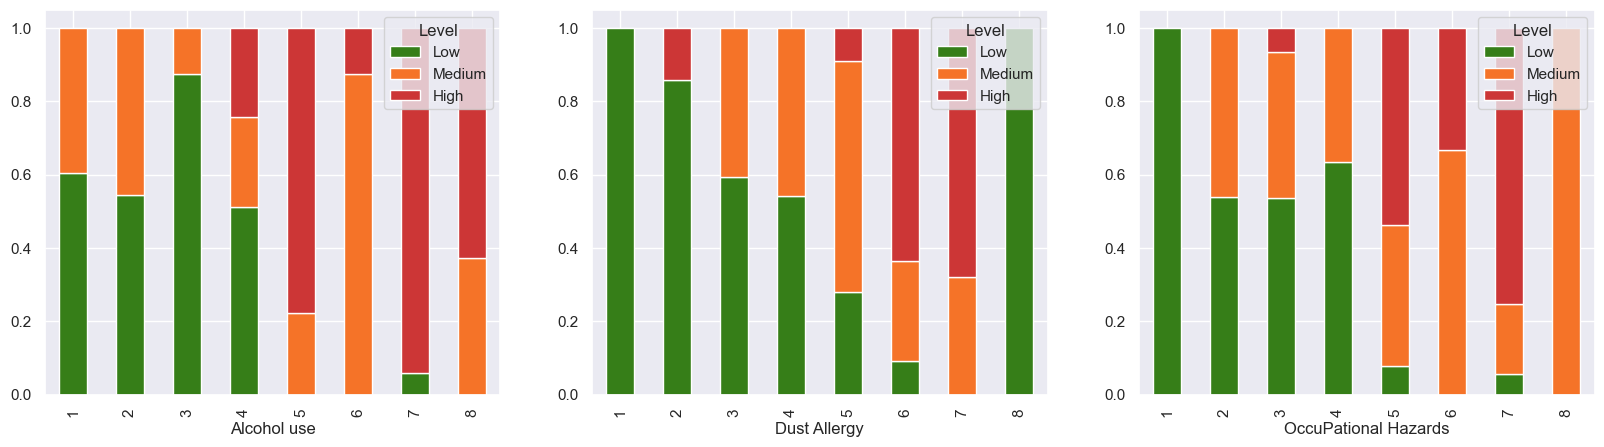

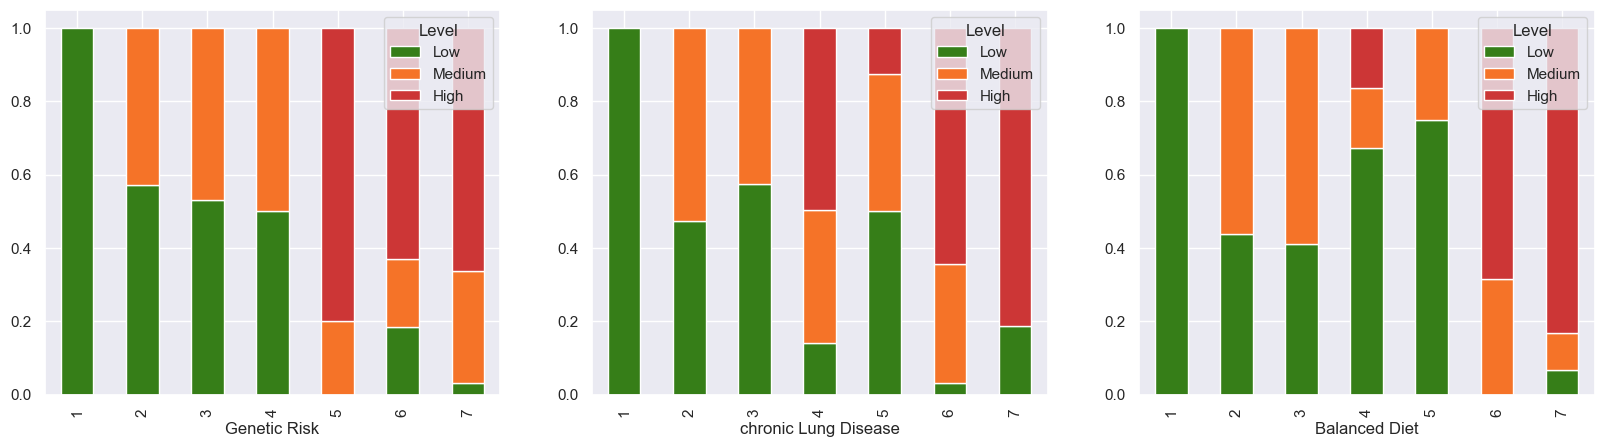

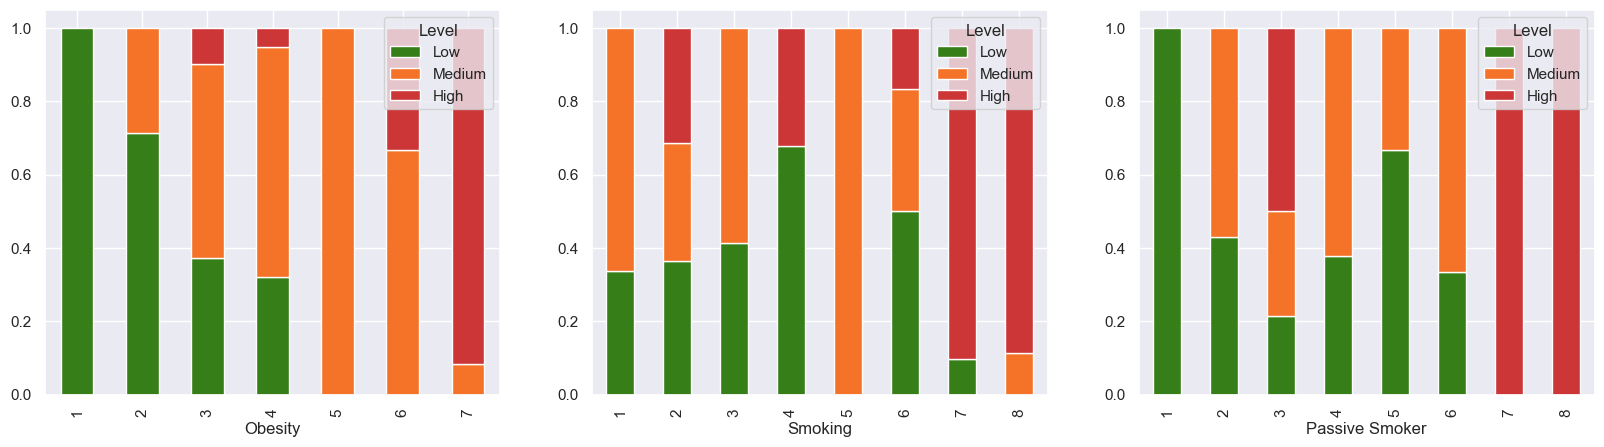

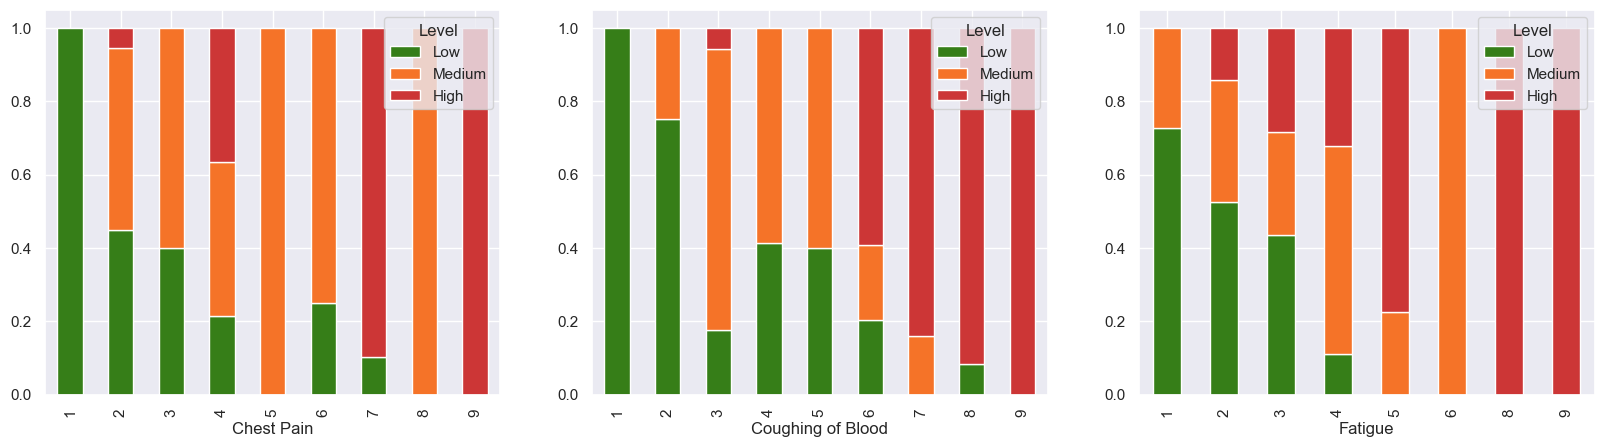

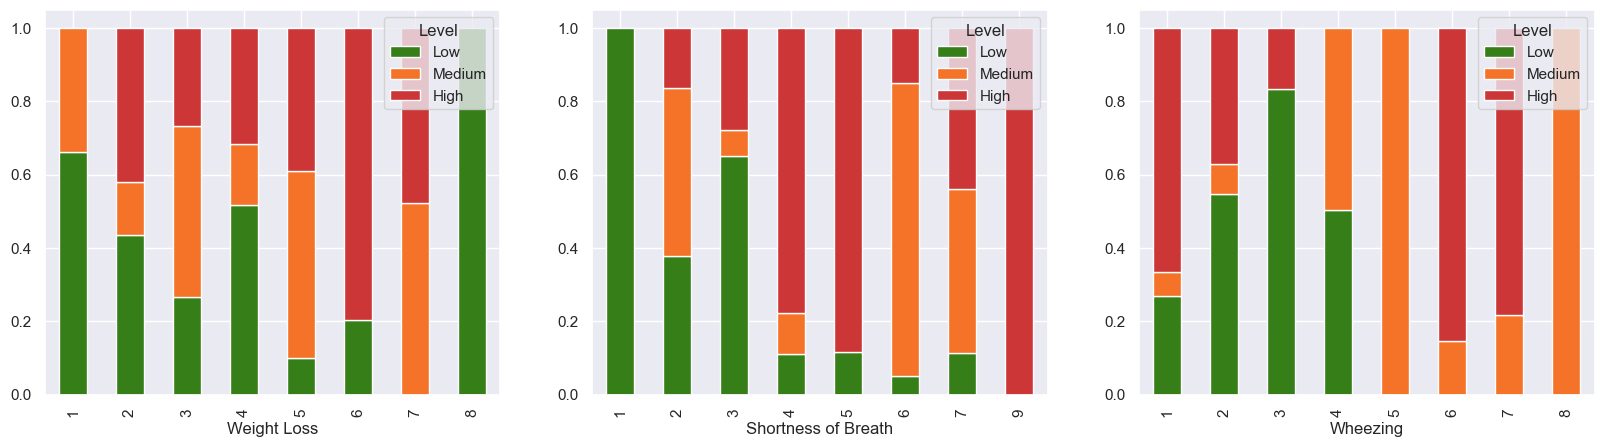

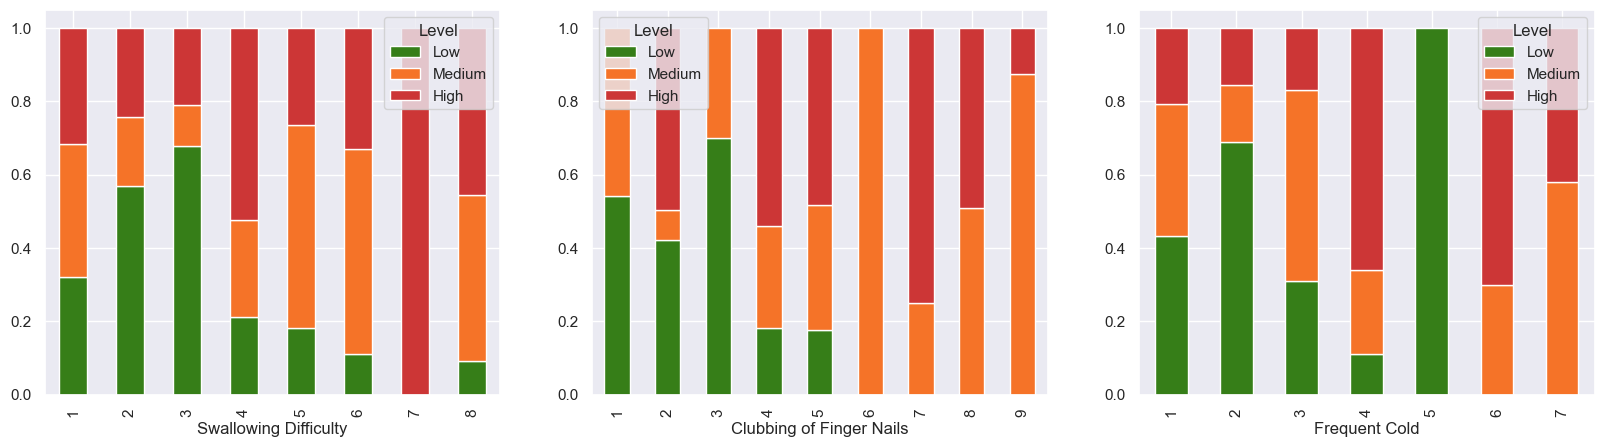

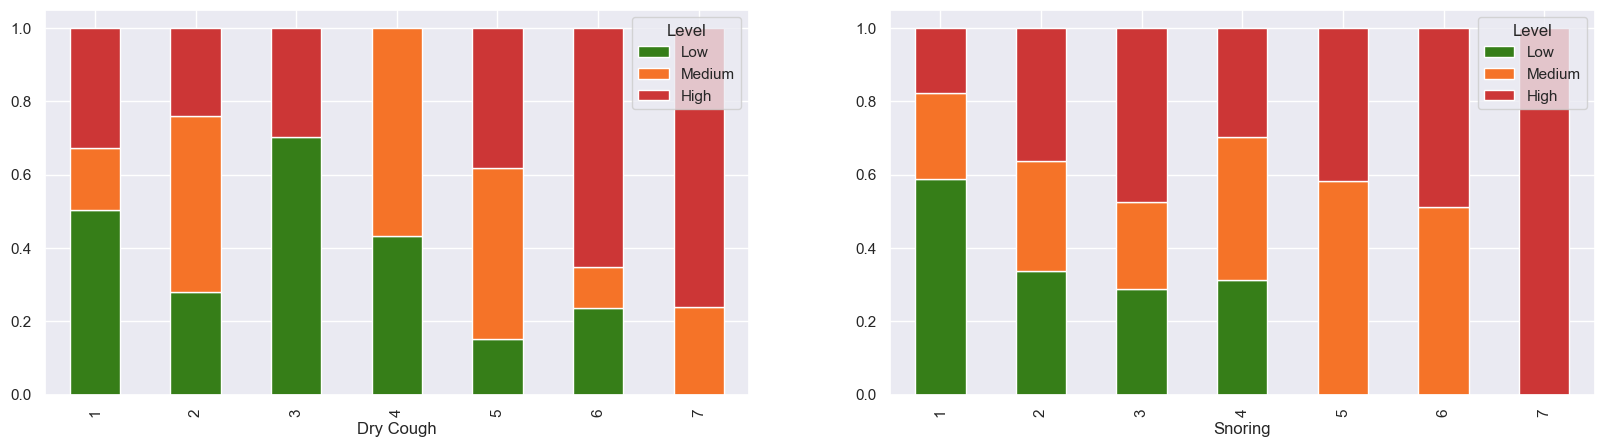

In [25]:
# Stacked Bar Charts Showing the distribution of Level
binned_df = df.copy()
binned_df['Age'] = pd.cut(binned_df['Age'], 8)
order = ['Low','Medium','High']
sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Age'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Gender'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Air Pollution'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Age_Gender_Pollution.png') 
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Alcohol use'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Dust Allergy'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['OccuPational Hazards'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Alc_Dust_Hazards.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Genetic Risk'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['chronic Lung Disease'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Balanced Diet'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Genetic_Lung_Diet.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Obesity'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Smoking'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Passive Smoker'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Obesity_Smoking_Passive.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Chest Pain'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Coughing of Blood'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Fatigue'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Chest_Blood_Fatigue.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Weight Loss'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Shortness of Breath'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Wheezing'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Weight_Breath_Wheezing.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,3)
pd.crosstab(index=binned_df['Swallowing Difficulty'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Clubbing of Finger Nails'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
pd.crosstab(index=binned_df['Frequent Cold'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[2])
plt.savefig('Graphs\StkBr_Swallowing_Nails_Cold.png')
plt.show()

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,2)
pd.crosstab(index=binned_df['Dry Cough'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[0])
pd.crosstab(index=binned_df['Snoring'],columns=binned_df['Level'],normalize="index").reindex(order, axis="columns").plot(kind='bar',stacked=True,color=['#367E18','#F57328','#CC3636'],ax=ax[1])
plt.savefig('Graphs\StkBr_Cough_Snoring.png')  
plt.show()

In [7]:
#  Create a score for separation, outliers, symmetry, distribution shape, and distribution spread.

# Separation:
def separation_score(df, predictor, response):
    """
    Calculates a separation score for a predictor variable with respect to the response variable
    """
    pivot_table = df.pivot_table(index=predictor, columns=response, aggfunc='size')
    pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
    pivot_table = pivot_table.fillna(0)
    score = pivot_table.diff(axis=1).abs().sum().sum()
    return score

separation_scores = {}
for predictor in ['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet',
                    'Obesity' ,'Smoking' ,'Passive Smoker' ,'Chest Pain' ,'Coughing of Blood','Fatigue','Weight Loss' ,'Shortness of Breath',
                    'Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']:
    separation_scores[predictor] = separation_score(df, predictor, 'Level')

print("Separation Scores:")
print(separation_scores)

#  The separation score measures the extent to which the levels of the response 
#  variable are separated for each predictor variable. A higher score indicates 
#  a stronger separation between the levels of the response variable.

Separation Scores:
{'Age': 32.727376271812986, 'Gender': 0.4017620925472969, 'Air Pollution': 6.056533799895977, 'Alcohol use': 7.551157966353545, 'Dust Allergy': 9.245480207439563, 'OccuPational Hazards': 7.72954080868782, 'Genetic Risk': 6.160341198665139, 'chronic Lung Disease': 6.039565415866109, 'Balanced Diet': 7.216056678413354, 'Obesity': 7.148825186695138, 'Smoking': 5.782067269931364, 'Passive Smoker': 7.215350071443151, 'Chest Pain': 8.047965730875752, 'Coughing of Blood': 8.454731477209744, 'Fatigue': 6.728570693070379, 'Weight Loss': 6.536532298869961, 'Shortness of Breath': 7.3075728248612055, 'Wheezing': 7.24401789022934, 'Swallowing Difficulty': 5.002059419338831, 'Clubbing of Finger Nails': 7.067999653018737, 'Frequent Cold': 6.376304608487123, 'Dry Cough': 4.51323028359801, 'Snoring': 4.156609093765939}


In [8]:
#Outliers
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

outliers_detected = detect_outliers(df)

outliers_df = pd.DataFrame(outliers_detected.sum(), columns=['Num Outliers'])
outliers_df.sort_values(by='Num Outliers', ascending=False, inplace=True)

print("Outliers detected:")
print(outliers_df)

Outliers detected:
                          Num Outliers
Age                                 10
Air Pollution                        0
chronic Lung Disease                 0
Wheezing                             0
Weight Loss                          0
Swallowing Difficulty                0
Snoring                              0
Smoking                              0
Shortness of Breath                  0
Patient Id                           0
Passive Smoker                       0
OccuPational Hazards                 0
Obesity                              0
Level                                0
Genetic Risk                         0
Gender                               0
Frequent Cold                        0
Fatigue                              0
Dust Allergy                         0
Dry Cough                            0
Coughing of Blood                    0
Clubbing of Finger Nails             0
Chest Pain                           0
Balanced Diet                        0
Alcoho

C:\Users\Bryson\AppData\Local\Temp\ipykernel_24284\3487695870.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Bryson\AppData\Local\Temp\ipykernel_24284\3487695870.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Bryson\AppData\Local\Temp\ipykernel_24284\3487695870.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


In [9]:
#  Symmetry:

def symmetry_score(df, predictor):
    """
    Calculates a symmetry score for a predictor variable
    """
    mean = df[predictor].mean()
    median = df[predictor].median()
    score = abs(mean - median) / (mean + median)
    return score

symmetry_scores = {}
for predictor in ['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet',
                    'Obesity' ,'Smoking' ,'Passive Smoker' ,'Chest Pain' ,'Coughing of Blood','Fatigue','Weight Loss' ,'Shortness of Breath',
                    'Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']:
    symmetry_scores[predictor] = symmetry_score(df, predictor)

print("Symmetry Scores:")
print(symmetry_scores)

#  The symmetry score measures the extent to which the mean and median are 
#  different for each predictor variable.  A lower score indicates a more 
#  symmetrical distribution, while a higher score indicates a more skewed 
#  distribution.

Symmetry Scores:
{'Age': 0.016043950036898343, 'Gender': 0.1673605328892589, 'Air Pollution': 0.12280701754385963, 'Alcohol use': 0.045696957021855104, 'Dust Allergy': 0.0747872816838334, 'OccuPational Hazards': 0.016260162601626032, 'Genetic Risk': 0.04384133611691022, 'chronic Lung Disease': 0.04534606205250596, 'Balanced Diet': 0.05782593334118474, 'Obesity': 0.05493207324276431, 'Smoking': 0.13644214162348875, 'Passive Smoker': 0.0237949969493594, 'Chest Pain': 0.05190803507940268, 'Coughing of Blood': 0.09696353990292358, 'Fatigue': 0.1248541423570595, 'Weight Loss': 0.12472647702407001, 'Shortness of Breath': 0.029126213592233035, 'Wheezing': 0.028674296001028655, 'Swallowing Difficulty': 0.03279111799638523, 'Clubbing of Finger Nails': 0.009718540956708313, 'Frequent Cold': 0.08200734394124848, 'Dry Cough': 0.01871896090665985, 'Snoring': 0.01248734390820112}


In [10]:
#  Kurtosis:

def kurtosis_score(df, predictor):
    """
    Calculates a kurtosis score for a predictor variable
    """
    kurtosis = df[predictor].kurtosis()
    score = kurtosis / df[predictor].std()**4
    return score

kurtosis_scores = {}
for predictor in ['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet',
                    'Obesity' ,'Smoking' ,'Passive Smoker' ,'Chest Pain' ,'Coughing of Blood','Fatigue','Weight Loss' ,'Shortness of Breath',
                    'Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']:
    kurtosis_scores[predictor] = kurtosis_score(df, predictor)

print("Kurtosis Scores:")
print(kurtosis_scores)

#  The kurtosis score measures the extent to which the distribution of each predictor 
#  variable is peaked or flat relative to a normal distribution. A lower score 
#  indicates a more normal distribution, while a higher score indicates a more peaked or 
#  flat distribution.

Kurtosis Scores:
{'Age': 2.8660945221556662e-06, 'Gender': -31.83448059443928, 'Air Pollution': -0.08160242327825379, 'Alcohol use': -0.03384678884788388, 'Dust Allergy': -0.05594161982282554, 'OccuPational Hazards': -0.06912283923850109, 'Genetic Risk': -0.078014428334992, 'chronic Lung Disease': -0.11170423388369143, 'Balanced Diet': -0.07890857238806803, 'Obesity': -0.07242026047101278, 'Smoking': -0.03739404902789601, 'Passive Smoker': -0.04649788246041747, 'Chest Pain': -0.050286231720002385, 'Coughing of Blood': -0.03721881492966111, 'Fatigue': -0.008209688103849146, 'Weight Loss': -0.058662638238904795, 'Shortness of Breath': -0.03135496538164969, 'Wheezing': -0.06812883357513538, 'Swallowing Difficulty': -0.03340067305142745, 'Clubbing of Finger Nails': -0.010351457788786027, 'Frequent Cold': -0.08359900132756475, 'Dry Cough': -0.0746771705659082, 'Snoring': -0.1165283624701592}


In [19]:
# Calculate the correlation matrix
corr_df = df.copy()
corr_df['Level'] = corr_df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
corr = corr_df.corr()

# Create a table of the correlation strengths
corr_table = corr[['Level']].loc[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet',
                                'Obesity' ,'Smoking' ,'Passive Smoker' ,'Chest Pain' ,'Coughing of Blood','Fatigue','Weight Loss' ,'Shortness of Breath',
                                'Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring']]
corr_table = corr_table.rename(columns={'Level': 'Correlation Strength'})

print("Correlation Table:")
print(corr_table)

Correlation Table:
                          Correlation Strength
Age                                   0.060048
Gender                               -0.164985
Air Pollution                         0.636038
Alcohol use                           0.718710
Dust Allergy                          0.713839
OccuPational Hazards                  0.673255
Genetic Risk                          0.701303
chronic Lung Disease                  0.609971
Balanced Diet                         0.706273
Obesity                               0.827435
Smoking                               0.519530
Passive Smoker                        0.703594
Chest Pain                            0.645461
Coughing of Blood                     0.782092
Fatigue                               0.625114
Weight Loss                           0.352738
Shortness of Breath                   0.497024
Wheezing                              0.242794
Swallowing Difficulty                 0.249142
Clubbing of Finger Nails              0.2

C:\Users\Bryson\AppData\Local\Temp\ipykernel_24284\3918005316.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr()


In [45]:
##Train Test Split
from sklearn.model_selection import train_test_split
df1 = df.drop(['index', 'Patient Id'], axis=1)
X = df.drop(['index','Level', 'Patient Id'], axis=1)
y = df['Level']

display(X.head())
display(y.head())

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

In [52]:
# Random Forest and Boruta
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)
from boruta import BorutaPy
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=113)
# find all relevant features
feat_selector.fit(np.array(X_train), np.array(y_train))
# check selected features
display(feat_selector.support_)
# check ranking of features
display(feat_selector.ranking_)
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(np.array(X_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	0
I

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [50]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(df1.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
feat_selector

Feature: Age                       Rank: 1,  Keep: True
Feature: Gender                    Rank: 2,  Keep: True
Feature: Air Pollution             Rank: 1,  Keep: True
Feature: Alcohol use               Rank: 1,  Keep: True
Feature: Dust Allergy              Rank: 1,  Keep: True
Feature: OccuPational Hazards      Rank: 1,  Keep: True
Feature: Genetic Risk              Rank: 1,  Keep: True
Feature: chronic Lung Disease      Rank: 1,  Keep: True
Feature: Balanced Diet             Rank: 1,  Keep: True
Feature: Obesity                   Rank: 1,  Keep: True
Feature: Smoking                   Rank: 1,  Keep: True
Feature: Passive Smoker            Rank: 1,  Keep: True
Feature: Chest Pain                Rank: 1,  Keep: True
Feature: Coughing of Blood         Rank: 1,  Keep: True
Feature: Fatigue                   Rank: 1,  Keep: True
Feature: Weight Loss               Rank: 1,  Keep: True
Feature: Shortness of Breath       Rank: 1,  Keep: True
Feature: Wheezing                  Rank: 1,  Kee

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=135, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x28C3AE27840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28C3AE27840, verbose=2)